In [1]:
import numpy as np
from skimage import io
from scipy import stats
import matplotlib.pyplot as plt
import heapq as heapq
%matplotlib inline

# do inverse fourier transform
# w = np.fft.ifft2( np.fft.ifftshift(q) ) 
# 
# fig2 = plt.figure()
# ax2  = fig2.add_subplot( 111 )
# ax2.axis('off')
#  io.
# ax2.imshow( np.array(w,dtype=int), cmap='gray' )



In [36]:
def fftLetters(letter):
    ffts=[]
    for i in range(1,11):
        f = io.imread('characters/{}{}.GIF'.format(letter, i))                       # Read in image
        f_f = np.array(f, dtype=float)                           # Convert to array
        z = np.fft.fft2(f_f)                                     # Apply fft to array
        
        q = np.fft.fftshift(z)                                   # Put u=0, v=0 to centre
        Magq =  np.absolute(q)                                   # Magnitude spectrum
        #Phaseq = np.angle(q)                                     # Phase spectrum
        ffts.append(Magq)
    
    x = np.zeros((400,640))
    x = np.sum (ffts, axis=0)
    
    return x    

def fftLetter(letter, i):
    ffts=[]
    
    f = io.imread('characters/{}{}.GIF'.format(letter, i))                       # Read in image
    f_f = np.array(f, dtype=float)                           # Convert to array
    z = np.fft.fft2(f_f)                                     # Apply fft to array
        
    q = np.fft.fftshift(z)                                   # Put u=0, v=0 to centre
    Magq =  np.absolute(q)                                   # Magnitude spectrum
    
    return Magq    

def printAllLetters(fig):
    figId =0
    for letter in ["S","T","V"]:
        for num in range(1,6):
            figId += 1
            printLetter(letter,num,figId,fig)
    
    fig.subplots_adjust(wspace=0.06, hspace=-0.5)
    plt.show()
    return

def printLetter(letter,number, figId,figure):
    mat = fftLetter(letter,number)
    ax1  = figure.add_subplot( 3,5,figId )
    ax1.axis('off')
    ax1.set_title(letter+str(number), fontsize=20)
    ax1.imshow( np.log( np.absolute(mat) + 1 ), cmap='gray' )
    return
                        
def printAllSumLetters():
    
    sumS = fftLetters("S")
    sumT = fftLetters("T")
    sumV = fftLetters("V")
    print(sumS[1,1])

    figure = plt.figure(figsize=(25,25))


    ax1  = figure.add_subplot( 3,3,1 )
    ax1.axis('on')
    ax1.set_title("S", fontsize=20)
    ax1.imshow( np.log( np.absolute(sumS) + 1 ), cmap='gray' )

    ax2  = figure.add_subplot( 3,3,2 )
    ax2.axis('on')
    ax2.set_title("T", fontsize=20 )
    ax2.imshow( np.log( np.absolute(sumT) + 1 ), cmap='gray' )

    ax3  = figure.add_subplot( 3,3,3 )
    ax3.axis('on')
    ax3.set_title("V", fontsize=20 )
    ax3.imshow( np.log( np.absolute(sumV) + 1 ), cmap='gray' )
    plt.show()
    return

def printImg(img):
    w = np.fft.ifft2( np.fft.ifftshift(img) ) 
# 
    fig2 = plt.figure()
    ax2  = fig2.add_subplot( 111 )
    ax2.axis('off')
#  io.
    ax2.imshow( np.array(w,dtype=int), cmap='gray' )
    return

/opt/anaconda/python3/lib/python3.5/site-packages/ipykernel/__main__.py:83: ComplexWarning: Casting complex values to real discards the imaginary part


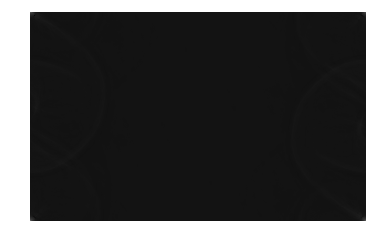

In [39]:
printAllSumLetters()
printImg(fftLetter("S"))

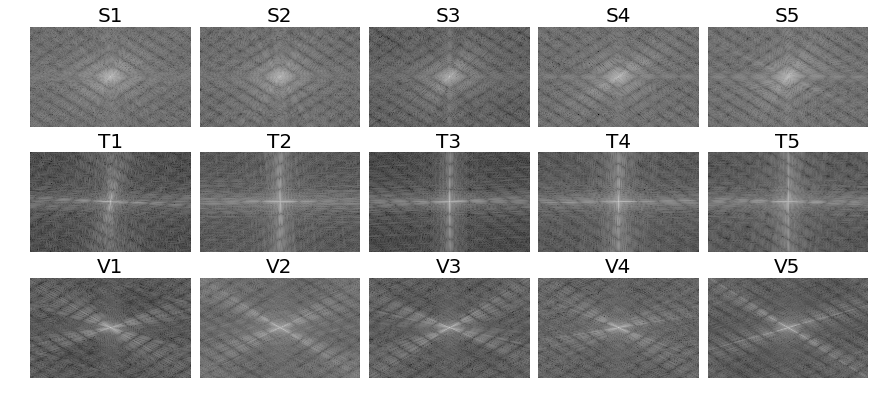

In [4]:
fig = plt.figure(figsize=(15,9))
printAllLetters(fig)

In [5]:
# //pass all magnitudes to a function and return only the ones needed in that feature

# Calculate magniture for that letter

def calcMag(letter, number):
    f = io.imread('characters/{}{}.GIF'.format(letter, number))                       # Read in image
    f_f = np.array(f, dtype=float)                           # Convert to array
    z = np.fft.fft2(f_f)                                     # Apply fft to array

    q = np.fft.fftshift(z)                                   # Put u=0, v=0 to centre
    Magq =  np.absolute(q)                                   # Magnitude spectrum
    
    return Magq  

def calcPwr(letter, number):
    f = io.imread('characters/{}{}.GIF'.format(letter, number))                       # Read in image
    f_f = np.array(f, dtype=float)                           # Convert to array
    z = np.fft.fft2(f_f)                                     # Apply fft to array

    q = np.fft.fftshift(z)                                   # Put u=0, v=0 to centre
    Magq =  np.absolute(q)                                   # Magnitude spectrum
    pwr= Magq*Magq
    
    return pwr  

def box1(magMatrix):
    totalMag = 0
    for x in range(0,150):
        for y in range(280,360):
            mag = magMatrix[x][y]
            power = mag*mag
            totalMag = totalMag+power
    return totalMag

def r1(mag):
    inner = 150
    outer = 200
    w, h = len(mag[0]), len(mag)
    d = lambda x, y : ((x-w//2)**2 + (y-h//2)**2)**0.5
    inRing = lambda x, y : inner <= d(x, y) and d(x, y) <= outer
    filterVals = lambda x, y : (mag[y][x]*mag[y][x]) if inRing(x, y) else 0
    return sum([sum([filterVals(x, y) for x in range(w)]) for y in range(h)])

def ring1(img):
    m = max([max(row) for row in img])
    inner = 150
    outer = 200
    w, h = len(img[0]), len(img)
    d = lambda x, y : ((x-w//2)**2 + (y-h//2)**2)**0.5
    inRing = lambda x, y : inner <= d(x, y) and d(x, y) <= outer
    filterVals = lambda x, y : (m + img[y][x]) / 2 if inRing(x, y) else img[y][x]
    return [[filterVals(x, y) for x in range(w)] for y in range(h)]


def magToPower(mag):
    pwrs = np.zeros((400,640))
    for i in range(400):
        for j in range(640):
            magVal = mag[i][j]
            pwrs[i][j] = magVal*magVal
    return pwrs 

    
def filterTopPwrs(pwrs):
    med = np.median(pwrs)
    pwrs2 = np.zeros((400,640))
    for x in range(0,400):
        for y in range(0,640):
            if (pwrs[x][y] > med) :
                pwrs2[x][y] = pwrs[x][y]
    return pwrs2

def sumMatrix(mat):
    totalMag = 0
    for x in range(0,400):
        for y in range(0,640):
            pwr = mat[x][y]
            totalMag = totalMag+pwr
    return totalMag


In [6]:
letters = ["S","T","V"]
boxPowers = []
ringPowers = []
for letter in letters:
    letterPwrArray = []
    for i in range(1,11):
        box = box1(calcMag(letter,i))
        ring = r1(calcMag(letter,i))
        
        boxPowers.append(box)
        #ringPowers.append(ring)
    boxPowers.append(letterPwrArray)

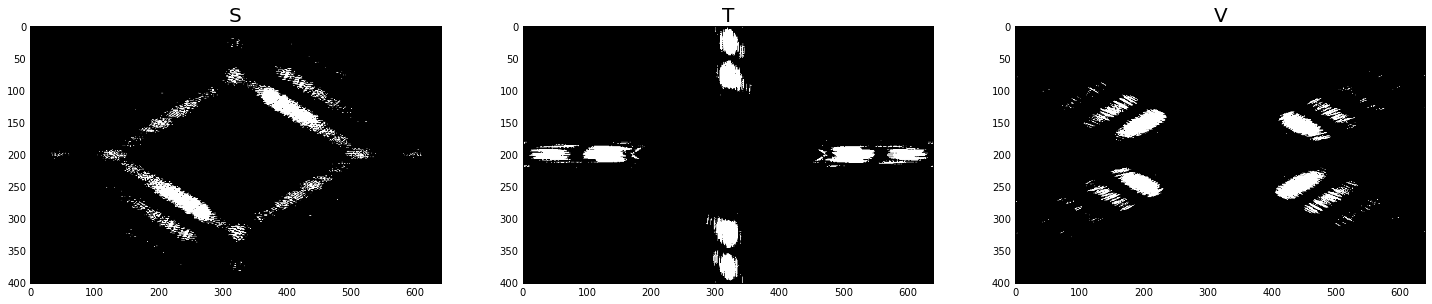

In [7]:
def createMasks(n, mag1, mag2, mag3, fig):
    allMags = [mag1, mag2, mag3]
    masks = []
    tempID = 0
    tempLetters = ["S","T","V"]
    for mag in allMags:
        newMask = []
        tempID += 1
        
        w, h = mag.shape
        for i in range(0, w):
            for j in range(0, h):
                if (1.5*np.absolute(i-w//2) + np.absolute(j-h//2) < 150):
                    mag[i, j] = 0
        
        for k in range(n):
            (i, j) = np.unravel_index(mag.argmax(), mag.shape)
            mag[i, j] = 0
            newMask.append((i, j))
        masks.append(newMask)
        im = np.zeros((400, 640))
        for (i, j) in newMask:
            im[i, j] = 1
        ax = fig.add_subplot(3,3,tempID)
        ax.set_title(tempLetters[tempID-1], fontsize=20 )
        ax.axis('on')
        ax.imshow(im, cmap='gray')
        
    plt.show()
    return masks[0], masks[1], masks[2]

sumS = fftLetters("S")
sumT = fftLetters("T")
sumV = fftLetters("V")

topPowers = []
# for letter in letters:
#     for i in range(1,11):
#         print("Step")
        
# topPowers.append(top)
# YsXs = highestPwrDif(sumS,sumT,sumV) 
fig = plt.figure(figsize=(25,25))
mask0, mask1, mask2 = createMasks(10000, sumS, sumT, sumV, fig)
    # print(mask0)
    # print(mask1)
    # print(mask2)


def extractFeatures(mask1, mask2, mag):
    x = 0
    for (i, j) in mask1:
        x += mag[i, j]
    y = 0
    for (i, j) in mask2:
        y += mag[i, j]
    return [x, y]

# im = np.zeros((400, 640))
# for (i, j) in mask1:
#     im[i, j] = 1
    
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.imshow(im, cmap='gray')
# plt.show()

# im = np.zeros((400, 640))
# for (i, j) in mask2:
#     im[i, j] = 1
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.imshow(im, cmap='gray')
# plt.show()

In [50]:
S = [extractFeatures(mask1, mask2, calcMag("S", i)) for i in range(1,11)]
S2 = [extractFeatures(mask0, mask2, calcMag("S", i)) for i in range(1,11)]
S3 = [extractFeatures(mask1, mask0, calcMag("S", i)) for i in range(1,11)]
STest = [extractFeatures(mask1, mask2, calcMag("S", i)) for i in range(11,16)]

T = [extractFeatures(mask1, mask2, calcMag("T", i)) for i in range(1,11)]
T2 = [extractFeatures(mask0, mask2, calcMag("T", i)) for i in range(1,11)]
T3 = [extractFeatures(mask1, mask0, calcMag("T", i)) for i in range(1,11)]
TTest = [extractFeatures(mask1, mask2, calcMag("T", i)) for i in range(11,16)]

V = [extractFeatures(mask1, mask2, calcMag("V", i)) for i in range(1,11)]
V2 = [extractFeatures(mask0, mask2, calcMag("V", i)) for i in range(1,11)]
V3 = [extractFeatures(mask1, mask0, calcMag("V", i)) for i in range(1,11)]
VTest = [extractFeatures(mask1, mask2, calcMag("V", i)) for i in range(11,16)]

X = [extractFeatures(mask1, mask2, calcMag(letter, i)) for letter in letters for i in range(1,11)]
S = np.matrix(S) / np.amax(X)
S2 = np.matrix(S2) / np.amax(X)
S3 = np.matrix(S3) / np.amax(X)
T = np.matrix(T) / np.amax(X)
T2 = np.matrix(T2) / np.amax(X)
T3 = np.matrix(T3) / np.amax(X)
V = np.matrix(V) / np.amax(X)
V2 = np.matrix(V2) / np.amax(X)
V3 = np.matrix(V3) / np.amax(X)

STest = np.matrix(STest) / np.amax(X)
TTest = np.matrix(TTest) / np.amax(X)
VTest = np.matrix(VTest) / np.amax(X)


y = 10*[0] + 10*[1] + 10*[2]
Sy = 5*[0]
Ty = 5*[1]
Vy = 5*[2]

In [53]:
A = [extractFeatures(mask1, mask2, calcMag("A", 1))]
B = [extractFeatures(mask1, mask2, calcMag("B", 1))]

A = np.matrix(A) / np.amax(X)
B = np.matrix(B) / np.amax(X)
X = np.matrix(X) / np.amax(X)

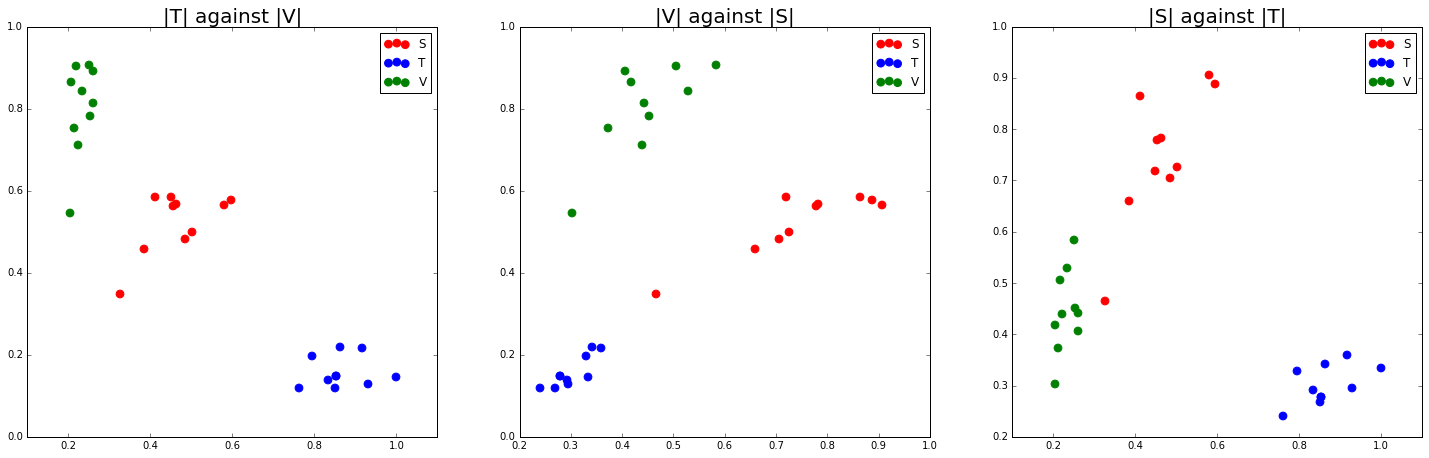

In [51]:
def plotTrain(mat0,mat1,mat2, fig, num):

    
#     ax0 = fig.add_subplot(111)
    ax1 = fig.add_subplot(3, 3, num)
#     ax2 = fig.add_subplot(3, 1, num)
#     ax3 = fig.add_subplot(3, 1, num)
#     ax0.scatter(centers[:,0],centers[:,1], marker="s", s=200)
    
    s_plot = ax1.scatter(mat0[:,0],mat0[:,1], marker="o", color = "red", s=60)
    t_plot = ax1.scatter(mat1[:,0],mat1[:,1], marker="o", color = "blue", s=60)
    v_plot = ax1.scatter(mat2[:,0],mat2[:,1], marker="o", color = "green", s=60)
    plt.legend( [ s_plot, t_plot, v_plot ], [ 'S', 'T', 'V' ], loc='upper right' )
    ax1.set_title("|"+letters[num%3]+"| against |"+letters[(num+1)%3]+"|", fontsize=20)
    
    
fig = plt.figure(figsize=(25,25))
plotTrain(S,T,V, fig,1)
plotTrain(S2,T2,V2, fig,2)
plotTrain(S3,T3,V3, fig,3)

plt.show()

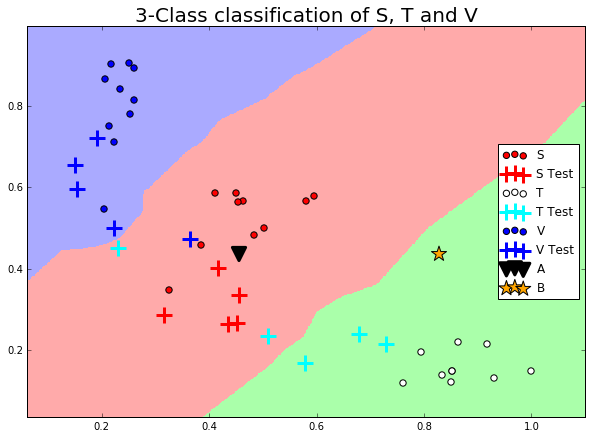

In [74]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


n_neighbors = 5

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights="distance")
clf.fit(X, y)


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() * 0.3, X[:, 0].max()* 1.1
y_min, y_max = X[:, 1].min() * 0.3, X[:, 1].max()*1.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
s_plot = plt.scatter(S[:, 0], S[:, 1], c="red", cmap=cmap_bold,s = 40)
t_plot = plt.scatter(T[:, 0], T[:, 1], c="white", cmap=cmap_bold,s = 40)
v_plot = plt.scatter(V[:, 0], V[:, 1], c="blue", cmap=cmap_bold,s = 40)
st_plot = plt.scatter(STest[:, 0], STest[:, 1], c="red", cmap=cmap_bold,marker ="+", s = 250, edgecolor='red', linewidth='3')
tt_plot = plt.scatter(TTest[:, 0], TTest[:, 1], c="cyan", cmap=cmap_bold,marker ="+", s = 250, edgecolor='blue', linewidth='3')
vt_plot = plt.scatter(VTest[:, 0], VTest[:, 1], c="blue", cmap=cmap_bold,marker ="+", s = 250, edgecolor='blue', linewidth='3')

a_plot = plt.scatter(A[:, 0], B[:, 1], c="black", cmap=cmap_bold,marker ="v", s = 175, edgecolor='black', linewidth='3')
b_plot = plt.scatter(B[:, 0], B[:, 1], c="orange", cmap=cmap_bold,marker ="*", s = 250, edgecolor='black', linewidth='1')


# plt.scatter(XTest[:, 0], XTest[:, 1], c=yTest, cmap=cmap_bold,marker ="v", s = 50)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("3-Class classification of S, T and V", fontsize=20)
plt.legend( [ s_plot, st_plot, t_plot, tt_plot, v_plot, vt_plot, a_plot, b_plot ], [ 'S','S Test', 'T', 'T Test', 'V', 'V Test', 'A', 'B' ], loc='center right' )
#               % (n_neighbors, weights))

plt.show()

[ 0.46534433  0.5230549 ]
[[ 0.00679033  0.00391219]
 [ 0.00391219  0.00592417]]
0
1
2


/opt/anaconda/python3/lib/python3.5/site-packages/ipykernel/__main__.py:71: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/python3/lib/python3.5/site-packages/ipykernel/__main__.py:71: RuntimeWarning: overflow encountered in true_divide
/opt/anaconda/python3/lib/python3.5/site-packages/ipykernel/__main__.py:72: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda/python3/lib/python3.5/site-packages/ipykernel/__main__.py:72: RuntimeWarning: overflow encountered in true_divide


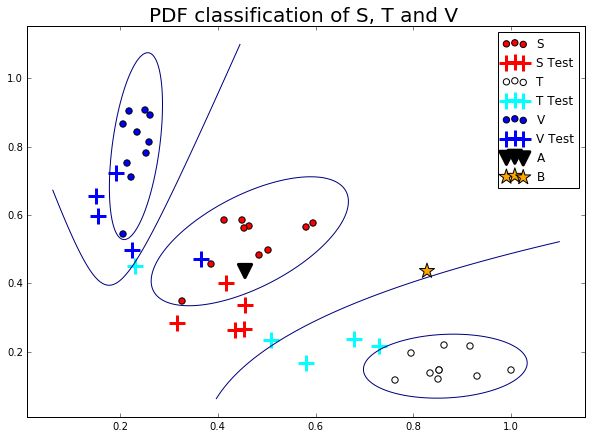

In [103]:
def computeMass(cov):
  return [np.exp(-3) * ((2*np.pi)**2 * np.linalg.det(cov))**(-0.5)]

def PDFs(means, covs, grid):
    pdfs = []
    for i in range(len(covs)):
        pdf = stats.multivariate_normal.pdf(grid, means[i], covs[i]).reshape(500,500)
        pdfs.append(pdf)
        print(i)
    return pdfs

meanClassS = np.squeeze(np.array(np.mean(S, axis=0)))
meanClassT = np.squeeze(np.array(np.mean(T, axis=0)))
meanClassV = np.squeeze(np.array(np.mean(V, axis=0)))

print(meanClassS)
covClassS = np.cov(S, rowvar=0)
covClassT = np.cov(T, rowvar=0)
covClassV = np.cov(V, rowvar=0)
print(covClassS)

xval = np.linspace(x_min, x_max, 500)
    
(grid1, grid2) = np.meshgrid(xval, xval)

grid1 = grid1.flatten()
grid2 = grid2.flatten()

grid = np.column_stack((grid1, grid2))

massCovClassS = computeMass(covClassS)
massCovClassT = computeMass(covClassT)
massCovClassV = computeMass(covClassV)

clusterClasses = [S, T, V]
clusterMeans   = [meanClassS, meanClassT, meanClassV]
clusterCovs    = [covClassS, covClassT, covClassV]
clusterMasses  = [massCovClassS, massCovClassT, massCovClassV]

allPDFs = PDFs(clusterMeans, clusterCovs, grid)

fig = plt.figure(figsize=(10,7))

ax0 = fig.add_subplot(111)
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)

# ax0.scatter(centers[:,0], centers[:,1], marker='^', s=sizeCentroid, color='green')

# ax1.scatter(S[:,0], S[:,1], marker='o', color='red', s=20)
# ax2.scatter(T[:,0], T[:,1], marker='o', color='black', s=20)
# ax3.scatter(V[:,0], V[:,1], marker='o', color='blue', s=20)
s_plot = ax1.scatter(S[:, 0], S[:, 1], c="red", cmap=cmap_bold,s = 40)
t_plot = ax2.scatter(T[:, 0], T[:, 1], c="white", cmap=cmap_bold,s = 40)
v_plot = ax3.scatter(V[:, 0], V[:, 1], c="blue", cmap=cmap_bold,s = 40)

st_plot = plt.scatter(STest[:, 0], STest[:, 1], c="red", cmap=cmap_bold,marker ="+", s = 250, edgecolor='red', linewidth='3')
tt_plot = plt.scatter(TTest[:, 0], TTest[:, 1], c="cyan", cmap=cmap_bold,marker ="+", s = 250, edgecolor='blue', linewidth='3')
vt_plot = plt.scatter(VTest[:, 0], VTest[:, 1], c="blue", cmap=cmap_bold,marker ="+", s = 250, edgecolor='blue', linewidth='3')

a_plot = plt.scatter(A[:, 0], B[:, 1], c="black", cmap=cmap_bold,marker ="v", s = 175, edgecolor='black', linewidth='3')
b_plot = plt.scatter(B[:, 0], B[:, 1], c="orange", cmap=cmap_bold,marker ="*", s = 250, edgecolor='black', linewidth='1')


plt.contour(xval, xval, allPDFs[0], clusterMasses[0])
plt.contour(xval, xval, allPDFs[1], clusterMasses[1])
plt.contour(xval, xval, allPDFs[2], clusterMasses[2])

oneAndTwo = np.divide(allPDFs[0], allPDFs[1])
oneAndThree = np.divide(allPDFs[0], allPDFs[2])
twoAndThree = np.divide(allPDFs[1], allPDFs[2])

plt.contour(xval, xval, oneAndTwo, [1])
plt.contour(xval, xval, oneAndThree, [1])
plt.title("PDF classification of S, T and V ", fontsize=20)
plt.legend( [ s_plot, st_plot, t_plot, tt_plot, v_plot, vt_plot, a_plot, b_plot ], [ 'S','S Test', 'T', 'T Test', 'V', 'V Test', 'A', 'B' ], loc='upper right' )
# plt.contour(xval, xval, twoAndThree, [1])

# pylab.ylim([0,10])
# pylab.xlim([0,10])

plt.show()

In [9]:
# def filterByArray(ysxs, mat):
#     filtered = np.zeros((400,640))
#     for i in range(100):
#         y = ysxs[0][i]
#         x = ysxs[1][i]
#         print(y)
#         print(x)
#         print()
#         filtered[y][x] = mat[y][x]
#     return filtered
# print(YsXs)
# print()
# topPowers = filterByArray(YsXs, calcPwr("S",1) )

NameError: name 'YsXs' is not defined

In [10]:
#  print(boxPowers)
# # print()
# # print(ringPowers)
# # print(ringPowers.shape)
# # print(box1(calcMag("S",1)))

# # print(r1(calcMag("S",1)))

# print(topPowers)
# #print(filterTopPwrs(boxPowers))
# print()
# #print(ringPowers)

[722798185439.22913, 681270588942.58643, 710769911850.10889, 526107142508.44861, 987045645262.60059, 670719064010.38025, 291961532242.15918, 1214746459901.5938, 965540091494.88501, 1338335062836.4226, [], 1231340686547.2314, 1285961471466.9504, 1470908193709.5244, 1514681394930.5947, 1522323696802.9917, 1285961471466.9504, 1936916865182.8228, 2009068267537.417, 1828669852515.647, 929849532557.16907, [], 128500139993.1281, 121809778990.84914, 139033876205.26367, 163849943761.59067, 118572977876.92438, 159195833341.97708, 104420107588.69249, 124782372281.09981, 148733314799.31186, 146174112241.7507, []]
[]

